In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [17]:
data = pd.read_excel('seoul_weather_1Y.xlsx')

In [18]:
data.columns = pd.Index(['datetime','temp', 'precipitation', 'wind_speed', 'wind_deg', 'humidity',
       'pressure', 'suntime', 'clouds'],
      dtype='object')

In [19]:
data.set_index('datetime', inplace=True)

In [20]:
data['precipitation'] = data['precipitation'].fillna(0)
data['clouds'] = data['clouds'].fillna(0)
data['suntime'] = data['suntime'].fillna(0)

In [21]:
data.describe()

,temp,precipitation,wind_speed,wind_deg,humidity,pressure,suntime,clouds
count,8735.000000,8736.000000,8734.00000,8734.000000,8736.000000,8736.000000,8736.000000,8736.000000
mean,13.396806,0.112168,1.73270,199.572933,55.031364,1006.481250,0.306536,4.423649
std,11.243931,0.955915,1.02817,113.830039,20.505778,8.190066,0.433793,4.041897
min,-14.200000,0.000000,0.00000,0.000000,10.000000,980.800000,0.000000,0.000000
25%,4.200000,0.000000,1.00000,90.000000,39.000000,1000.300000,0.000000,0.000000
50%,13.100000,0.000000,1.50000,250.000000,54.000000,1006.300000,0.000000,4.000000
75%,22.700000,0.000000,2.40000,290.000000,71.000000,1012.800000,0.900000,9.000000
max,39.400000,29.500000,7.00000,360.000000,98.000000,1028.300000,1.000000,10.000000


In [22]:
data.dropna(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8733 entries, 2018-06-01 01:00:00 to 2019-05-31 00:00:00
Data columns (total 8 columns):
temp             8733 non-null float64
precipitation    8733 non-null float64
wind_speed       8733 non-null float64
wind_deg         8733 non-null float64
humidity         8733 non-null int64
pressure         8733 non-null float64
suntime          8733 non-null float64
clouds           8733 non-null float64
dtypes: float64(7), int64(1)
memory usage: 614.0 KB


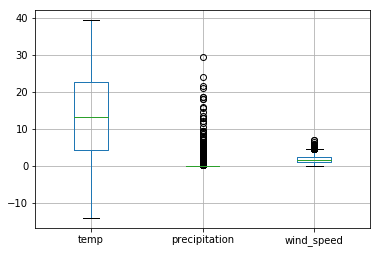

In [24]:
data.iloc[:,:3].boxplot()

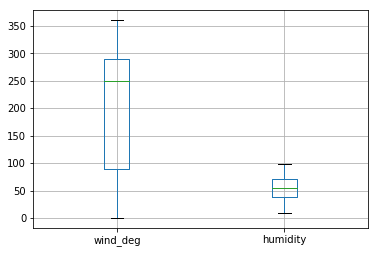

In [25]:
data.iloc[:,3:5].boxplot()

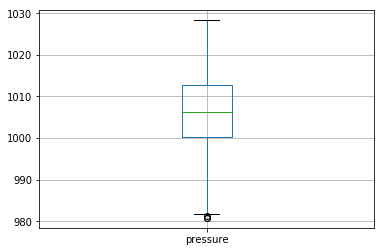

In [26]:
data.iloc[:,5:6].boxplot()

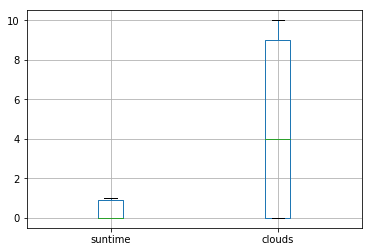

In [27]:
data.iloc[:,6:].boxplot()

In [37]:
X = data.drop(columns=['wind_deg','suntime'])

Text(0,0.5,'Distortion')

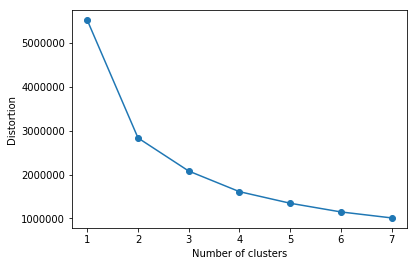

In [38]:
plt.figure()
distortions = [] 
for k in range(1,8):
    km = KMeans(n_clusters = k,
               init='k-means++',
               n_init = 100,
               max_iter = 300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [39]:
#silhouette_score도 찍어본다
for k in range(2,5):
    km = KMeans(n_clusters = k,
               init='k-means++',
               n_init = 100,
               max_iter = 300,
               random_state=0).fit(X)
    print("score for %d clusters:%.3f" % (k, silhouette_score(X, km.labels_)))

score for 2 clusters:0.395
score for 3 clusters:0.343
score for 4 clusters:0.337


In [40]:
def clustering(k, X):
    km = KMeans(n_clusters=k).fit(X)
    y = km.predict(X)
    km_center = km.cluster_centers_
    return pd.DataFrame(data=km_center,columns=X.columns)

In [41]:
clustering(8, X)

,temp,precipitation,wind_speed,humidity,pressure,clouds
0,23.857411,9.196429e-03,1.476786,69.939286,998.673750,5.047321
1,0.525979,1.779359e-03,1.530427,48.961744,1014.892883,2.892349
2,28.409560,3.824092e-04,2.063480,47.804015,998.265679,4.427342
3,5.366301,2.533784e-02,1.318581,74.573480,1010.246791,4.632601
4,17.017171,8.176615e-05,2.326492,29.472608,1006.010303,3.426002
5,13.975064,1.106383e-03,1.596340,54.349787,1006.628936,4.492766
6,19.100554,1.037472e+00,1.339246,89.723947,999.064302,8.072062
7,-0.852972,5.967449e-16,2.199896,29.301356,1017.424088,2.969760


### hierarchy clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from collections import Counter

In [43]:
hac = AgglomerativeClustering(linkage='ward', n_clusters=8)
hac.fit(X)
print(Counter(hac.labels_))

Counter({0: 1655, 1: 1430, 2: 1271, 5: 1175, 6: 962, 4: 850, 3: 776, 7: 614})


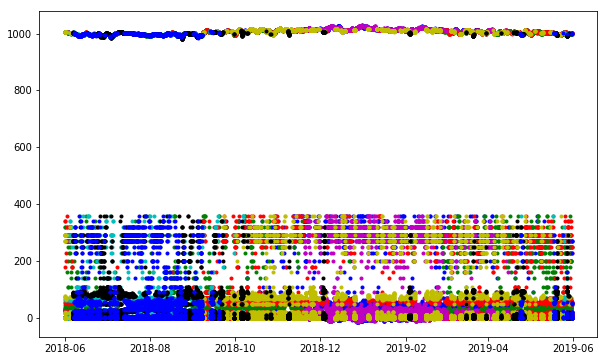

In [44]:
colors = ['b', 'g','r','c','m','y','k']*3
plt.figure(figsize=(10,6))
for idx_cluster in range(hac.n_clusters):
    plt.plot(data[hac.labels_ == idx_cluster], colors[idx_cluster]+'.')

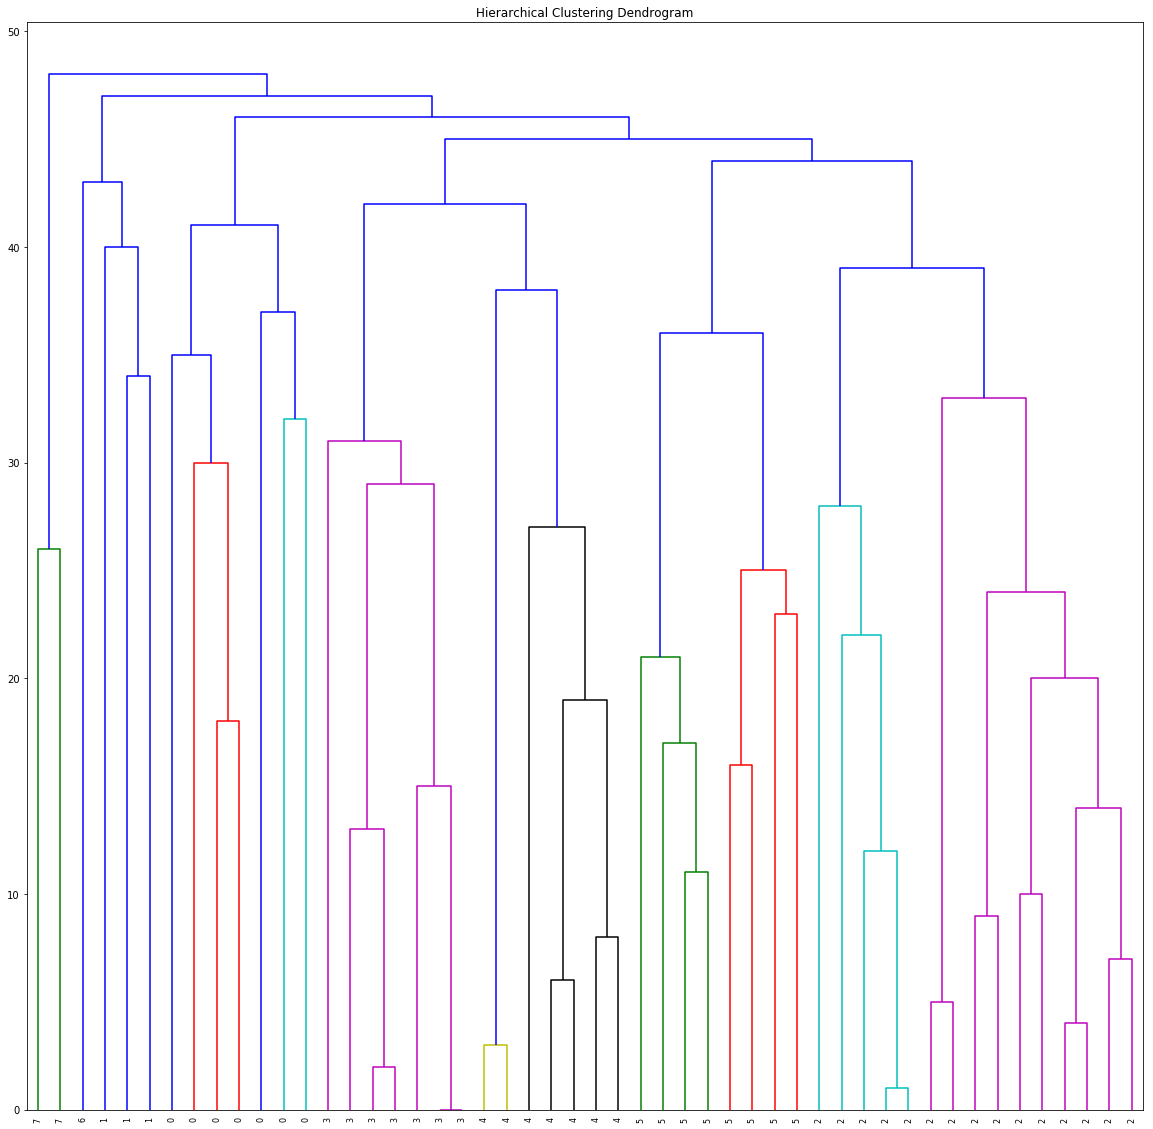

In [45]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hac.fit(data[:50])
#hac.fit(X[:50])
#hac.fit(X)

plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hac, labels=hac.labels_)
plt.show()